### project customer Segmentation

### K Means Clustering

#### online retail is a transnation data set which contains all the transaction ouccuring btw 01/12/2010 and 09/12/2011 for UK-based and registration non-store online retail. the company mainly sells enique all-occasion gifts. Many customers of the company are wholesalers.

## What we want to acheive?



#### segement the customer based on RFM so that the company can target its customers efficiently.

 ### R (Recency) : Number of days since last purchase

### F (Frequency) : Number of transections

### M (Moetary) : Total amount of Transaction (revenue contribution)

#### import required libraies for clustering

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('Copy of Online Retail.csv')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
# shape of dataframe

df.shape

(541909, 8)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data cleaning

In [9]:
# calculating the missing values in dataframe
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# droping rows having missing values

df.dropna(inplace=True)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
df.shape

(406829, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
# New Attribute : Monetary

df['Amount']=df['Quantity']*df['UnitPrice']
df1=df.groupby('CustomerID')['Amount'].sum()
df1=df1.reset_index()
df1.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [16]:
# New Attribute : Frequency
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [17]:
df2=df.groupby('CustomerID')['InvoiceDate'].count()
df2=df2.reset_index()
df2.columns=['CustomerID' , 'Frequency']
df2.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [19]:
# merging the two dfs
dfm=pd.merge(df1,df2, on='CustomerID',how='inner')
dfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [20]:
# new Attribute : Recency

# convert to datetime to proper datatype
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']


0        2010-01-12 08:26:00
1        2010-01-12 08:26:00
2        2010-01-12 08:26:00
3        2010-01-12 08:26:00
4        2010-01-12 08:26:00
                 ...        
541904   2011-09-12 12:50:00
541905   2011-09-12 12:50:00
541906   2011-09-12 12:50:00
541907   2011-09-12 12:50:00
541908   2011-09-12 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [21]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Amount                float64
dtype: object

In [22]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
# Compute the maximum date to know the last transection date

max_date=max(df['InvoiceDate'])
max_date

Timestamp('2011-12-10 17:19:00')

In [24]:
# compute the diffrence btw max date and transection date

df['diff']=max_date-df['InvoiceDate']
df['diff']


0        697 days 08:53:00
1        697 days 08:53:00
2        697 days 08:53:00
3        697 days 08:53:00
4        697 days 08:53:00
                ...       
541904    89 days 04:29:00
541905    89 days 04:29:00
541906    89 days 04:29:00
541907    89 days 04:29:00
541908    89 days 04:29:00
Name: diff, Length: 406829, dtype: timedelta64[ns]

In [25]:
# compute recency of customer
df3=df.groupby('CustomerID')['diff'].min()
df3=df3.reset_index()
df3.columns=['CustomerID','Recency']
df3.head()

,CustomerID,Recency
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00
2,12348.0,76 days 04:06:00
3,12349.0,19 days 07:28:00
4,12350.0,311 days 01:18:00


In [26]:
# extract number of days only
df3['Recency']=df3['Recency'].dt.days
df3.head()

,CustomerID,Recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [27]:
# merge the dataframe to get the final REM dataframe\
rfm=pd.merge(dfm,df3,on='CustomerID', how='inner')
rfm.columns=['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


In [28]:
rfm.shape

(4372, 4)

ValueError: weight='bolt' is invalid

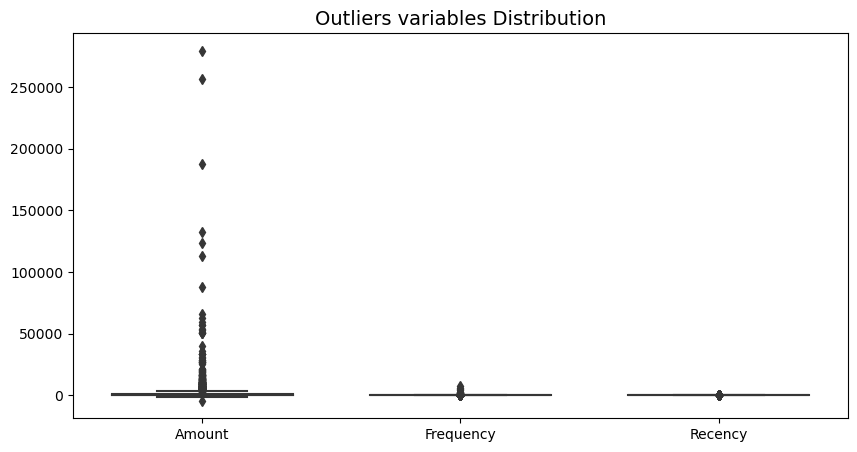

In [29]:
# outlier Analysis of Frequency and Recent

attributes= ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize']=[10,5]
sns.boxplot(data=rfm[attributes], orient="v", palette='hot',whis=1.5,saturation=1,width=0.7)
plt.title('Outliers variables Distribution',fontsize=14,fontweight='bolt')
plt.ylabel("Range",fontweight = 'bolt')
plt.Xlabel("Attributes",fontweight= 'bolt')

In [31]:
# removing (statistical) outliers for amount

Q1=rfm.Amount.quantile(0.05)
Q2= rfm.Amount.quantile(0.95)
# inter quartile range formula
IQR = Q2=Q1
# outlier formula
rfm=rfm[(rfm.Amount>=Q1-1.5*IQR) & (rfm.Amount<=Q2+1.5*IQR)]

# removing (statistical) outliers for Recency
Q1= rfm.Recency.quantile(0.05)
Q2=rfm.Recency.quantile(0.95)
IQR=Q2-Q1
rfm=rfm[(rfm.Recency>=Q1-1.5*IQR) & (rfm.Recency<=Q2+1.5*IQR)]

# removing (statistical) Outliers for Frequency

Q1=rfm.Frequency.quantile(0.05)
Q2=rfm.Frequency.quantile(0.95)
IQR=Q2-Q1
rfm=rfm[(rfm.Frequency>=Q1-1.5*IQR) & (rfm.Frequency<=Q2+1.5*IQR)]

### Scaling the Features

In [32]:
rfm_df=rfm[['Amount','Frequency','Recency']]

# Instantiate
scaler= StandardScaler()

# fit transform
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(930, 3)

In [33]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
#rfm_df_scaled
rfm_df_scaled.columns=['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-2.296663,-0.877680,1.054214
1,-0.925557,-0.746366,0.212629
2,0.628876,-0.352427,0.792081
3,0.305357,-0.286771,0.267815
4,-0.997964,-0.680710,-0.511686


###  Model Building

In [34]:
# k-means with some arbitrary k

kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [35]:
kmeans.labels_

array([0, 0, 3, 2, 0, 3, 3, 2, 0, 2, 0, 0, 0, 0, 3, 1, 2, 2, 2, 0, 3, 0,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 0, 0, 2, 0, 3, 3, 2, 2, 2,
       3, 2, 3, 0, 0, 3, 3, 2, 0, 3, 0, 2, 0, 1, 3, 2, 3, 1, 2, 3, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 3, 2, 0, 3, 3, 3, 3, 2, 2, 3, 0,
       2, 3, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 1, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 1, 3, 1, 2, 1, 1, 2, 3, 2, 2, 1, 3, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 3, 3, 2, 2, 2, 3, 2, 2, 3, 0, 2, 3,
       3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 0, 2, 3, 3, 2, 2, 0, 0, 3, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 1, 0, 3, 3, 2, 1, 0, 3, 1, 2, 3,
       3, 2, 2, 0, 0, 0, 0, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 0, 3, 3, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 3, 2, 0, 0, 2, 3, 1, 1, 3, 3, 3,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 3, 3, 2, 2, 0, 1,

In [36]:
set(kmeans.labels_)

{0, 1, 2, 3}

### Elbow Curve to get the right number of Clusters


C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

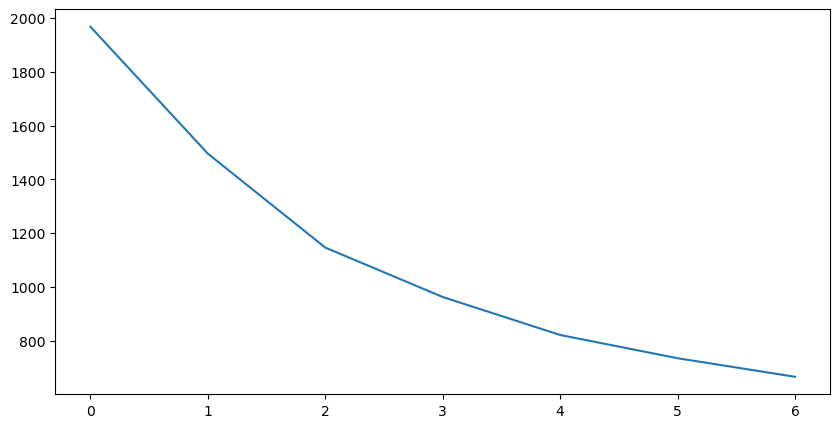

In [37]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [38]:
# final model with k=3

kmeans=KMeans(n_clusters=3,max_iter=300)
kmeans.fit(rfm_df_scaled)

C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ashutosh Rawat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [39]:
kmeans.labels_

array([2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1,

In [40]:
kmeans.predict(rfm_df_scaled)

array([2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1,

In [41]:
# assign the label

rfm['Cluster_Id']=kmeans.predict(rfm_df_scaled)
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.0,2,326,2
6,12353.0,89.0,4,204,2
14,12361.0,189.9,10,288,0
19,12367.0,168.9,11,212,0
43,12401.0,84.3,5,99,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

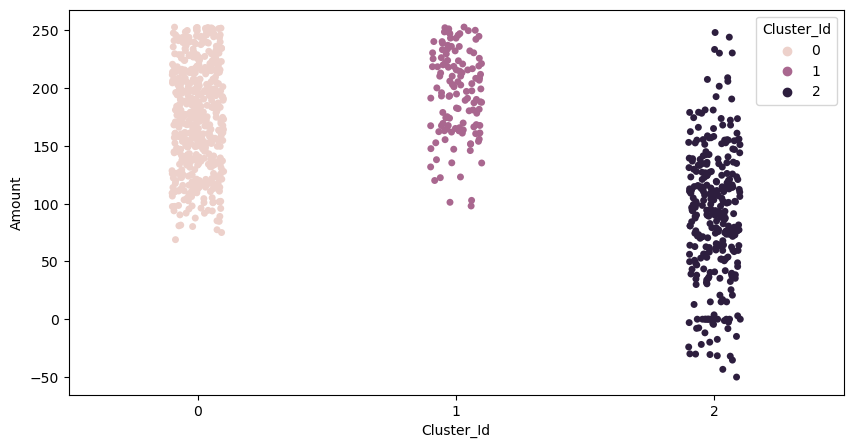

In [42]:
# BOx plot to visualize Cluster id vs Amount

sns.stripplot(x='Cluster_Id',y='Amount',data=rfm ,hue='Cluster_Id')


<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

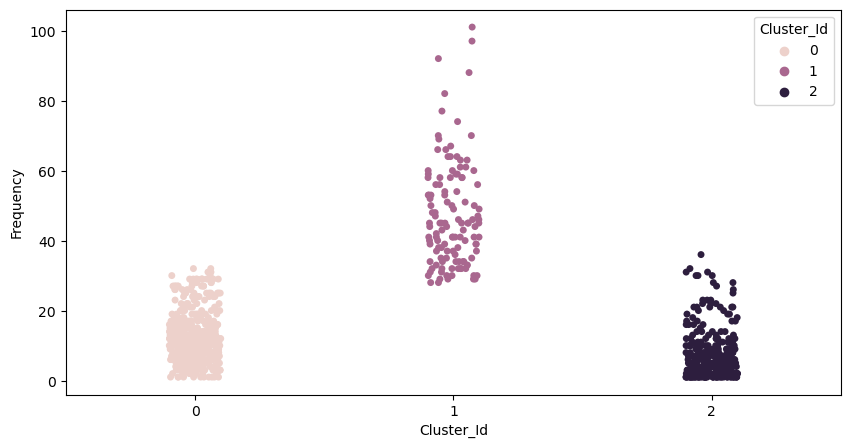

In [43]:
sns.stripplot(x='Cluster_Id',y='Frequency',data=rfm,hue='Cluster_Id')
#plt.savefig('stripplot.png')

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

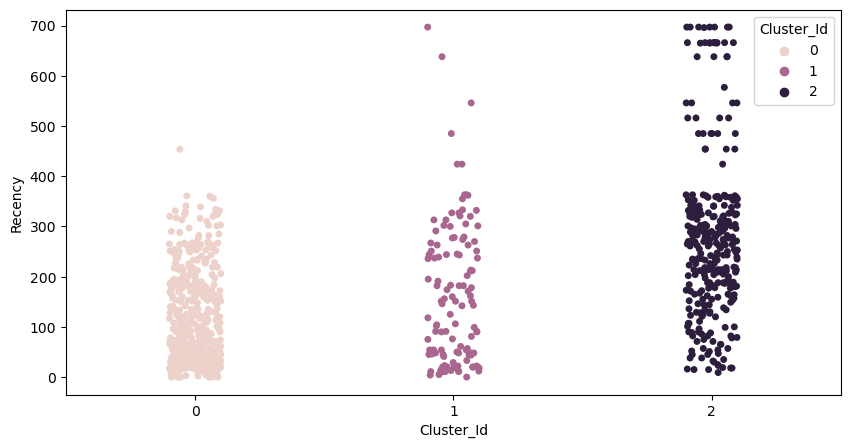

In [44]:
sns.stripplot(x='Cluster_Id',y='Recency',data=rfm,hue='Cluster_Id')